In [6]:
from utils import get_last_model
import matplotlib.pyplot as plt
import cv2

In [7]:
model = get_last_model(model_name="jersey_number_recognition", verbose=False)

INFO - 15:16:29.239: Getting model from: models/jersey_number_recognition/runs/train/weights/best.pt


In [20]:
testing_images = [
    "../../cropped/magicVShawks.mp4--3--2d6ffce8-5756-4cc0-8805-64bdd4f89de1.jpg",
    "../../cropped/magicVShawks.mp4--7--30161814-f537-457d-bd57-b63dd50ff2bf.jpg",
    "../../cropped/magicVShawks.mp4--17--13d0642b-a88c-4925-baf6-486d8f870d7b.jpg",
    "../../cropped/miaVStor.mp4--14--61a8af8b-396c-448f-8be8-d3604b935bc3.jpg",
    "../../cropped/milVSwsh.mp4--13--f78c5bc2-816e-4e50-b20f-af0256ecddaf.jpg",
    "../../101f63aeca5-5bd7-4cc1-8366-d9a37a3b0317.jpg",
    "../../351ff6c4761-901c-4d11-a357-a167ac7028c0.jpg"
]

6 tensor(0.3781, device='cuda:0')
1 tensor(0.3100, device='cuda:0')
61


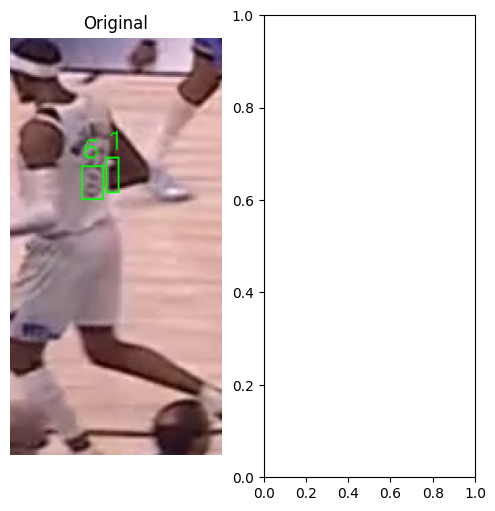

In [21]:
frame = cv2.imread(testing_images[len(testing_images)-1])
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
results = model.predict(frame, conf=0.3, verbose=False)
jersey_number = ''

for result in results:
    boxes = result.boxes.xyxy
    scores = result.boxes.conf
    labels = result.boxes.cls

    for box, score, label in zip(boxes, scores, labels):
        number = model.names[int(label)]
        jersey_number = f'{jersey_number}{number}'
        x1, y1, x2, y2 = map(int, box)

        label_text = f"{model.names[int(label)]}"
        print(label_text, score)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 1)
        cv2.putText(frame, label_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

fig, axs = plt.subplots(1, 2, figsize=(6, 6))
axs[0].imshow(frame)
axs[0].set_title("Original")
axs[0].axis("off")
print(jersey_number)

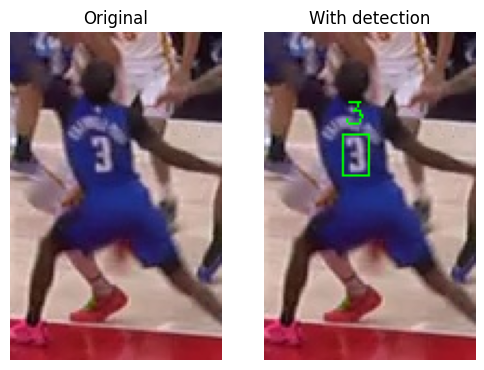

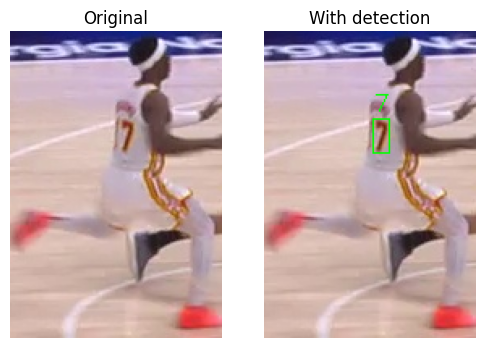

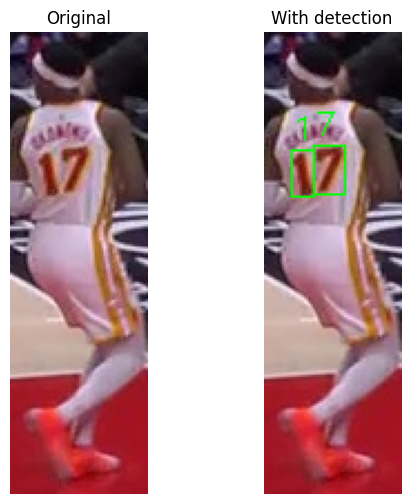

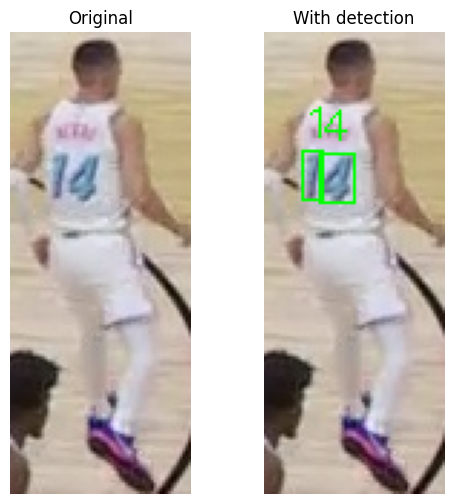

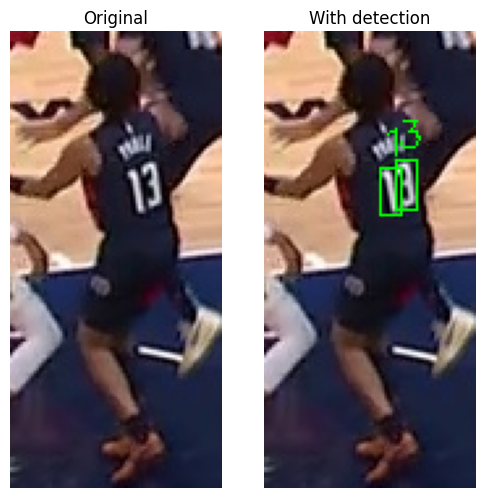

FileNotFoundError: [Errno 2] No such file or directory: '../../101f63aeca5-5bd7-4cc1-8366-d9a37a3b0317.jpg'

In [10]:
for image_path in testing_images:
    img_original = cv2.imread(image_path)
    img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_pred = img_original.copy()
    
    results = model.predict(img_pred, conf=0.3, verbose=False)

    for result in results:
        boxes = result.boxes.xyxy
        scores = result.boxes.conf
        labels = result.boxes.cls

        for box, score, label in zip(boxes, scores, labels):
            x1, y1, x2, y2 = map(int, box)
            label_text = f"{model.names[int(label)]}"
            
            cv2.rectangle(img_pred, (x1, y1), (x2, y2), (0, 255, 0), 1)
            cv2.putText(img_pred, label_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    axs[0].imshow(img_original)
    axs[0].set_title("Original")
    axs[0].axis("off")
    
    axs[1].imshow(img_pred)
    axs[1].set_title("With detection")
    axs[1].axis("off")
    
    plt.show()